In [2]:
import pandas as pd
import numpy as np 
from collections import Counter

In [33]:
import os
import pandas as pd


def get_mealData(mealType):

    # Directory containing the CGMacros folders
    base_dir = "CGMacros 2"  # replace with your actual directory path

    # Initialize an empty list to collect all the data
    all_data = []

    # Loop through all the folders (CGMacros-001 to CGMacros-049)
    for i in range(1, 50):
        # Format folder name (CGMacros-001 to CGMacros-049)
        folder_name = f"CGMacros-{i:03d}"
        folder_path = os.path.join(base_dir, folder_name)
        
        # Path to the CSV file inside each folder
        csv_path = os.path.join(folder_path, f"CGMacros-{i:03d}.csv")
        
        # Check if the file exists
        if os.path.exists(csv_path):
            # Read the CSV file
            print(csv_path)
            df = pd.read_csv(csv_path)
            
            # Filter rows where Meal Type is 'Dinner' or 'dinner'
            # Ensure that 'Meal Type' is converted to lowercase and stripped of whitespace
            interim_df = df[df['Meal Type'].str.lower().str.strip() == mealType.lower().strip()]


            
            # Add a SubjectID column (extract from the folder name)
            interim_df['SubjectID'] = f"{i:03d}"
            
            # Add a Day column (extract day from the Timestamp)
            interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
            
            # Extract the time of day from the Timestamp and create a new column 'Time_of_Day'
            interim_df['Time_of_Day'] = pd.to_datetime(interim_df['Timestamp']).dt.time
            
            # Select the relevant columns
            interim_df = interim_df[['SubjectID', 'Timestamp', 'Day', 'Time_of_Day', 'Calories', 'Carbs', 'Protein', 'Fat', 'Fiber']]
            # Append this data to the list
            all_data.append(interim_df)

    # Concatenate all the data from the list into a single DataFrame
    final_df = pd.concat(all_data, ignore_index=True)

    # Sort by SubjectID and Timestamp to ensure correct order for the day counter
    final_df = final_df.sort_values(by=['SubjectID', 'Timestamp'])

    # Generate a Day Counter within each SubjectID
    final_df['Day Counter'] = final_df.groupby('SubjectID').cumcount() + 1

    # Group by 'SubjectID' and 'Day Counter', summing up the macronutrients for each day
    final_df = final_df.groupby(['SubjectID', 'Day'], as_index=False).agg({
        'Timestamp': 'first',  # Keep the first timestamp of the day
        'Day Counter':'first',
        'Time_of_Day': 'first',  # Keep the first time of day for the day
        'Calories': 'sum',
        'Carbs': 'sum',
        'Protein': 'sum',
        'Fat': 'sum',
        'Fiber': 'sum',
    })


    return final_df



breakfast_df = get_mealData('Breakfast')
lunch_df = get_mealData('Lunch',)
dinner_df = get_mealData('Dinner')

                    


CGMacros 2/CGMacros-001/CGMacros-001.csv
CGMacros 2/CGMacros-002/CGMacros-002.csv
CGMacros 2/CGMacros-003/CGMacros-003.csv
CGMacros 2/CGMacros-004/CGMacros-004.csv
CGMacros 2/CGMacros-005/CGMacros-005.csv
CGMacros 2/CGMacros-006/CGMacros-006.csv
CGMacros 2/CGMacros-007/CGMacros-007.csv
CGMacros 2/CGMacros-008/CGMacros-008.csv
CGMacros 2/CGMacros-009/CGMacros-009.csv
CGMacros 2/CGMacros-010/CGMacros-010.csv
CGMacros 2/CGMacros-011/CGMacros-011.csv
CGMacros 2/CGMacros-012/CGMacros-012.csv
CGMacros 2/CGMacros-013/CGMacros-013.csv
CGMacros 2/CGMacros-014/CGMacros-014.csv
CGMacros 2/CGMacros-015/CGMacros-015.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-016/CGMacros-016.csv
CGMacros 2/CGMacros-017/CGMacros-017.csv
CGMacros 2/CGMacros-018/CGMacros-018.csv
CGMacros 2/CGMacros-019/CGMacros-019.csv
CGMacros 2/CGMacros-020/CGMacros-020.csv
CGMacros 2/CGMacros-021/CGMacros-021.csv
CGMacros 2/CGMacros-022/CGMacros-022.csv
CGMacros 2/CGMacros-023/CGMacros-023.csv
CGMacros 2/CGMacros-026/CGMacros-026.csv
CGMacros 2/CGMacros-027/CGMacros-027.csv
CGMacros 2/CGMacros-028/CGMacros-028.csv
CGMacros 2/CGMacros-029/CGMacros-029.csv
CGMacros 2/CGMacros-030/CGMacros-030.csv
CGMacros 2/CGMacros-031/CGMacros-031.csv
CGMacros 2/CGMacros-032/CGMacros-032.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-033/CGMacros-033.csv
CGMacros 2/CGMacros-034/CGMacros-034.csv
CGMacros 2/CGMacros-035/CGMacros-035.csv
CGMacros 2/CGMacros-036/CGMacros-036.csv
CGMacros 2/CGMacros-038/CGMacros-038.csv
CGMacros 2/CGMacros-039/CGMacros-039.csv
CGMacros 2/CGMacros-041/CGMacros-041.csv
CGMacros 2/CGMacros-042/CGMacros-042.csv
CGMacros 2/CGMacros-043/CGMacros-043.csv
CGMacros 2/CGMacros-044/CGMacros-044.csv
CGMacros 2/CGMacros-045/CGMacros-045.csv
CGMacros 2/CGMacros-046/CGMacros-046.csv
CGMacros 2/CGMacros-047/CGMacros-047.csv
CGMacros 2/CGMacros-048/CGMacros-048.csv
CGMacros 2/CGMacros-049/CGMacros-049.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-001/CGMacros-001.csv
CGMacros 2/CGMacros-002/CGMacros-002.csv
CGMacros 2/CGMacros-003/CGMacros-003.csv
CGMacros 2/CGMacros-004/CGMacros-004.csv
CGMacros 2/CGMacros-005/CGMacros-005.csv
CGMacros 2/CGMacros-006/CGMacros-006.csv
CGMacros 2/CGMacros-007/CGMacros-007.csv
CGMacros 2/CGMacros-008/CGMacros-008.csv
CGMacros 2/CGMacros-009/CGMacros-009.csv
CGMacros 2/CGMacros-010/CGMacros-010.csv
CGMacros 2/CGMacros-011/CGMacros-011.csv
CGMacros 2/CGMacros-012/CGMacros-012.csv
CGMacros 2/CGMacros-013/CGMacros-013.csv
CGMacros 2/CGMacros-014/CGMacros-014.csv
CGMacros 2/CGMacros-015/CGMacros-015.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-016/CGMacros-016.csv
CGMacros 2/CGMacros-017/CGMacros-017.csv
CGMacros 2/CGMacros-018/CGMacros-018.csv
CGMacros 2/CGMacros-019/CGMacros-019.csv
CGMacros 2/CGMacros-020/CGMacros-020.csv
CGMacros 2/CGMacros-021/CGMacros-021.csv
CGMacros 2/CGMacros-022/CGMacros-022.csv
CGMacros 2/CGMacros-023/CGMacros-023.csv
CGMacros 2/CGMacros-026/CGMacros-026.csv
CGMacros 2/CGMacros-027/CGMacros-027.csv
CGMacros 2/CGMacros-028/CGMacros-028.csv
CGMacros 2/CGMacros-029/CGMacros-029.csv
CGMacros 2/CGMacros-030/CGMacros-030.csv
CGMacros 2/CGMacros-031/CGMacros-031.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-032/CGMacros-032.csv
CGMacros 2/CGMacros-033/CGMacros-033.csv
CGMacros 2/CGMacros-034/CGMacros-034.csv
CGMacros 2/CGMacros-035/CGMacros-035.csv
CGMacros 2/CGMacros-036/CGMacros-036.csv
CGMacros 2/CGMacros-038/CGMacros-038.csv
CGMacros 2/CGMacros-039/CGMacros-039.csv
CGMacros 2/CGMacros-041/CGMacros-041.csv
CGMacros 2/CGMacros-042/CGMacros-042.csv
CGMacros 2/CGMacros-043/CGMacros-043.csv
CGMacros 2/CGMacros-044/CGMacros-044.csv
CGMacros 2/CGMacros-045/CGMacros-045.csv
CGMacros 2/CGMacros-046/CGMacros-046.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-047/CGMacros-047.csv
CGMacros 2/CGMacros-048/CGMacros-048.csv
CGMacros 2/CGMacros-049/CGMacros-049.csv
CGMacros 2/CGMacros-001/CGMacros-001.csv
CGMacros 2/CGMacros-002/CGMacros-002.csv
CGMacros 2/CGMacros-003/CGMacros-003.csv
CGMacros 2/CGMacros-004/CGMacros-004.csv
CGMacros 2/CGMacros-005/CGMacros-005.csv
CGMacros 2/CGMacros-006/CGMacros-006.csv
CGMacros 2/CGMacros-007/CGMacros-007.csv
CGMacros 2/CGMacros-008/CGMacros-008.csv
CGMacros 2/CGMacros-009/CGMacros-009.csv
CGMacros 2/CGMacros-010/CGMacros-010.csv
CGMacros 2/CGMacros-011/CGMacros-011.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-012/CGMacros-012.csv
CGMacros 2/CGMacros-013/CGMacros-013.csv
CGMacros 2/CGMacros-014/CGMacros-014.csv
CGMacros 2/CGMacros-015/CGMacros-015.csv
CGMacros 2/CGMacros-016/CGMacros-016.csv
CGMacros 2/CGMacros-017/CGMacros-017.csv
CGMacros 2/CGMacros-018/CGMacros-018.csv
CGMacros 2/CGMacros-019/CGMacros-019.csv
CGMacros 2/CGMacros-020/CGMacros-020.csv
CGMacros 2/CGMacros-021/CGMacros-021.csv
CGMacros 2/CGMacros-022/CGMacros-022.csv
CGMacros 2/CGMacros-023/CGMacros-023.csv
CGMacros 2/CGMacros-026/CGMacros-026.csv
CGMacros 2/CGMacros-027/CGMacros-027.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-028/CGMacros-028.csv
CGMacros 2/CGMacros-029/CGMacros-029.csv
CGMacros 2/CGMacros-030/CGMacros-030.csv
CGMacros 2/CGMacros-031/CGMacros-031.csv
CGMacros 2/CGMacros-032/CGMacros-032.csv
CGMacros 2/CGMacros-033/CGMacros-033.csv
CGMacros 2/CGMacros-034/CGMacros-034.csv
CGMacros 2/CGMacros-035/CGMacros-035.csv
CGMacros 2/CGMacros-036/CGMacros-036.csv
CGMacros 2/CGMacros-038/CGMacros-038.csv
CGMacros 2/CGMacros-039/CGMacros-039.csv
CGMacros 2/CGMacros-041/CGMacros-041.csv
CGMacros 2/CGMacros-042/CGMacros-042.csv
CGMacros 2/CGMacros-043/CGMacros-043.csv
CGMacros 2/CGMacros-044/CGMacros-044.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-045/CGMacros-045.csv
CGMacros 2/CGMacros-046/CGMacros-046.csv
CGMacros 2/CGMacros-047/CGMacros-047.csv
CGMacros 2/CGMacros-048/CGMacros-048.csv
CGMacros 2/CGMacros-049/CGMacros-049.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [126]:
lunch_df

,SubjectID,Date,Lunch_Timestamp,Day,Lunch_Time,Lunch_Calories,Lunch_Carbs,Lunch_Protein,Lunch_Fat,Lunch_Fiber
0,001,2020-05-01,2020-05-01 14:23:00,1,14:23:00,1170.0,85.0,88.0,54.2,12.0
1,001,2020-05-02,2020-05-02 12:00:00,2,12:00:00,840.0,89.0,17.0,42.0,3.0
2,001,2020-05-03,2020-05-03 14:51:00,3,14:51:00,615.0,26.0,67.0,30.0,3.0
3,001,2020-05-04,2020-05-04 12:59:00,4,12:59:00,555.0,94.0,12.0,13.0,3.0
4,001,2020-05-05,2020-05-05 13:16:00,5,13:16:00,425.0,28.0,27.0,23.0,3.0
...,...,...,...,...,...,...,...,...,...,...
430,049,2025-05-16,2025-05-16 12:08:00,6,12:08:00,1110.0,93.0,84.0,44.0,4.0
431,049,2025-05-17,2025-05-17 12:16:00,7,12:16:00,575.0,76.0,22.0,18.5,11.0
432,049,2025-05-18,2025-05-18 13:01:00,8,13:01:00,585.0,40.0,76.0,17.0,13.0
433,049,2025-05-19,2025-05-19 13:37:00,9,13:37:00,445.0,43.0,20.0,20.0,13.0


In [4]:
lunch_df
lunchCounter = Counter(lunch_df)
set(sorted(lunch_df['SubjectID']))

{'001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '038',
 '039',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049'}

In [5]:
#lunch_df.columns = ['SubjectID','Date','Lunch_Timestamp','Day','Lunch_Time','Lunch_Calories','Lunch_Carbs','Lunch_Protein','Lunch_Fat','Lunch_Fiber']
lunchCounter = Counter(lunch_df['SubjectID'])
lunch_df

,SubjectID,Day,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber
0,001,2020-05-01,2020-05-01 14:23:00,1,14:23:00,1170.0,85.0,88.0,54.2,12.0
1,001,2020-05-02,2020-05-02 12:00:00,2,12:00:00,840.0,89.0,17.0,42.0,3.0
2,001,2020-05-03,2020-05-03 14:51:00,3,14:51:00,615.0,26.0,67.0,30.0,3.0
3,001,2020-05-04,2020-05-04 12:59:00,4,12:59:00,555.0,94.0,12.0,13.0,3.0
4,001,2020-05-05,2020-05-05 13:16:00,5,13:16:00,425.0,28.0,27.0,23.0,3.0
...,...,...,...,...,...,...,...,...,...,...
430,049,2025-05-16,2025-05-16 12:08:00,6,12:08:00,1110.0,93.0,84.0,44.0,4.0
431,049,2025-05-17,2025-05-17 12:16:00,7,12:16:00,575.0,76.0,22.0,18.5,11.0
432,049,2025-05-18,2025-05-18 13:01:00,8,13:01:00,585.0,40.0,76.0,17.0,13.0
433,049,2025-05-19,2025-05-19 13:37:00,9,13:37:00,445.0,43.0,20.0,20.0,13.0


In [6]:
#dinner_df.columns = ['SubjectID','Date','Dinner_Timestamp','Day','Dinner_Time','Dinner_Calories','Dinner_Carbs','Dinner_Protein','Dinner_Fat','Dinner_Fiber']
dinner_df
dinnerCounter = Counter(dinner_df['SubjectID'])

In [7]:
breakfast_df
#breakfast_df.columns = ['SubjectID','Date','Breakfast_Timestamp','Day','Breakfast_Time','Breakfast_Calories','Breakfast_Carbs','Breakfast_Protein','Breakfast_Fat','Breakfast_Fiber']
breakfast_df
breakfastCounter = Counter(breakfast_df['SubjectID'])
breakfastCounter


In [21]:
snacks = get_mealData('Snacks')

CGMacros 2/CGMacros-001/CGMacros-001.csv
CGMacros 2/CGMacros-002/CGMacros-002.csv
CGMacros 2/CGMacros-003/CGMacros-003.csv
CGMacros 2/CGMacros-004/CGMacros-004.csv
CGMacros 2/CGMacros-005/CGMacros-005.csv
CGMacros 2/CGMacros-006/CGMacros-006.csv
CGMacros 2/CGMacros-007/CGMacros-007.csv
CGMacros 2/CGMacros-008/CGMacros-008.csv
CGMacros 2/CGMacros-009/CGMacros-009.csv
CGMacros 2/CGMacros-010/CGMacros-010.csv
CGMacros 2/CGMacros-011/CGMacros-011.csv
CGMacros 2/CGMacros-012/CGMacros-012.csv
CGMacros 2/CGMacros-013/CGMacros-013.csv
CGMacros 2/CGMacros-014/CGMacros-014.csv
CGMacros 2/CGMacros-015/CGMacros-015.csv


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['SubjectID'] = f"{i:03d}"
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Day'] = pd.to_datetime(interim_df['Timestamp']).dt.date
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/696048834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

CGMacros 2/CGMacros-016/CGMacros-016.csv
CGMacros 2/CGMacros-017/CGMacros-017.csv
CGMacros 2/CGMacros-018/CGMacros-018.csv
CGMacros 2/CGMacros-019/CGMacros-019.csv
CGMacros 2/CGMacros-020/CGMacros-020.csv
CGMacros 2/CGMacros-021/CGMacros-021.csv
CGMacros 2/CGMacros-022/CGMacros-022.csv
CGMacros 2/CGMacros-023/CGMacros-023.csv
CGMacros 2/CGMacros-026/CGMacros-026.csv
CGMacros 2/CGMacros-027/CGMacros-027.csv
CGMacros 2/CGMacros-028/CGMacros-028.csv
CGMacros 2/CGMacros-029/CGMacros-029.csv
CGMacros 2/CGMacros-030/CGMacros-030.csv
CGMacros 2/CGMacros-031/CGMacros-031.csv
CGMacros 2/CGMacros-032/CGMacros-032.csv
CGMacros 2/CGMacros-033/CGMacros-033.csv
CGMacros 2/CGMacros-034/CGMacros-034.csv
CGMacros 2/CGMacros-035/CGMacros-035.csv
CGMacros 2/CGMacros-036/CGMacros-036.csv
CGMacros 2/CGMacros-038/CGMacros-038.csv
CGMacros 2/CGMacros-039/CGMacros-039.csv
CGMacros 2/CGMacros-041/CGMacros-041.csv
CGMacros 2/CGMacros-042/CGMacros-042.csv
CGMacros 2/CGMacros-043/CGMacros-043.csv
CGMacros 2/CGMac

In [23]:
snacksCounter = Counter(snacks['SubjectID'])
snacksCounter

Counter({'004': 9, '001': 5, '003': 5, '002': 2})

In [28]:
snackDf = pd.concat((snacks,snack2))
snackCounter = Counter(snackDf['SubjectID'])
len(snackCounter)

36

In [20]:
snack2
snackCounter = Counter(snack2['SubjectID'])
snackCounter

Counter({'017': 10,
         '015': 9,
         '022': 9,
         '041': 9,
         '005': 8,
         '009': 8,
         '010': 8,
         '014': 8,
         '011': 7,
         '013': 7,
         '016': 7,
         '019': 7,
         '023': 7,
         '031': 7,
         '039': 7,
         '044': 7,
         '020': 6,
         '034': 6,
         '038': 6,
         '043': 6,
         '045': 6,
         '006': 5,
         '026': 5,
         '027': 5,
         '018': 4,
         '021': 4,
         '028': 4,
         '048': 3,
         '012': 2,
         '033': 2,
         '042': 2,
         '007': 1})

In [41]:
merged_df_snack_dinner = pd.merge(dinner_df, snackDf, on=['SubjectID', 'Day'], how='inner')


/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/3042044713.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_snack_dinner['Calories Ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


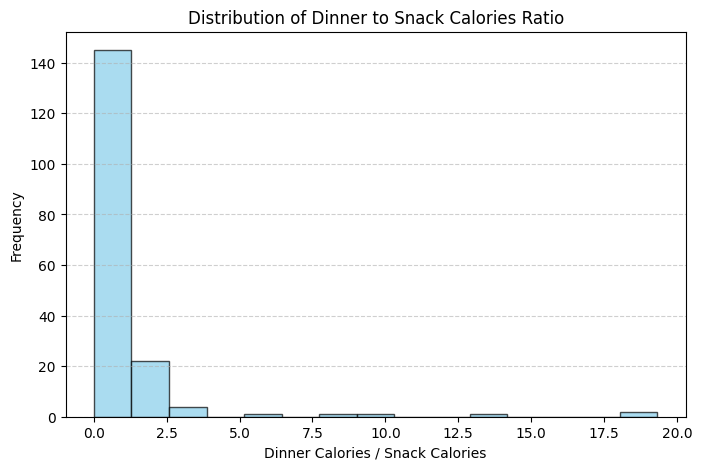

In [45]:
import matplotlib.pyplot as plt
merged_df_snack_dinner['Calories Ratio'] =  merged_df_snack_dinner['Calories_y']/merged_df_snack_dinner['Calories_x']  # Compute ratio

# Handle division by zero (replace infinities with NaN)
merged_df_snack_dinner['Calories Ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values (optional, but ensures clean histogram)
df = merged_df_snack_dinner.dropna(subset=['Calories Ratio'])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Calories Ratio'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dinner Calories / Snack Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Dinner to Snack Calories Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_70214/2115240256.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calories Ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


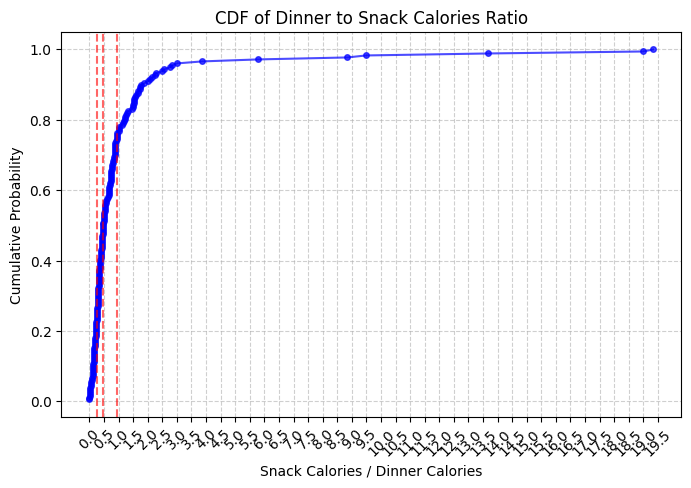

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute the Dinner-to-Snack Calories Ratio
df['Calories Ratio'] =  df['Calories_y']/df['Calories_x']

df['Calories Ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df = df.dropna(subset=['Calories Ratio'])

# Sort ratios for CDF calculation
sorted_ratios = np.sort(df['Calories Ratio'])
cdf = np.arange(1, len(sorted_ratios) + 1) / len(sorted_ratios)  # CDF calculation

# Plot CDF
plt.figure(figsize=(8, 5))
plt.plot(sorted_ratios, cdf, marker='o', linestyle='-', color='blue', alpha=0.7, markersize=4)

# Add percentile reference lines (e.g., 25th, 50th, 75th)
for p in [25, 50, 75]:
    percentile_value = np.percentile(sorted_ratios, p)
    plt.axvline(percentile_value, color='red', linestyle='--', alpha=0.6)

# Set X-axis ticks at 0.1 intervals
x_min, x_max = sorted_ratios.min(), sorted_ratios.max()
x_ticks = np.arange(np.floor(x_min * 2) / 2, np.ceil(x_max * 2) / 2 + 0.5, 0.5) 
plt.xticks(x_ticks, rotation=45)  # Rotate for better visibility if needed

# Labels and grid
plt.xlabel('Snack Calories / Dinner Calories')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Dinner to Snack Calories Ratio')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [46]:
merged_df_snack_dinner

,SubjectID,Day,Timestamp_x,Day Counter_x,Time_of_Day_x,Calories_x,Carbs_x,Protein_x,Fat_x,Fiber_x,Timestamp_y,Day Counter_y,Time_of_Day_y,Calories_y,Carbs_y,Protein_y,Fat_y,Fiber_y,Calories Ratio
0,001,2020-05-02,2020-05-02 19:52:00,2,19:52:00,330.0,32.0,4.0,22.0,4.0,2020-05-02 00:15:00,1,00:15:00,148.0,33.0,0.0,2.0,0.0,0.448485
1,001,2020-05-03,2020-05-03 20:02:00,3,20:02:00,240.0,28.0,9.0,10.0,3.0,2020-05-03 00:03:00,3,00:03:00,357.0,62.0,10.0,7.0,0.0,1.487500
2,001,2020-05-04,2020-05-04 19:42:00,4,19:42:00,210.0,1.0,13.0,17.0,0.0,2020-05-04 17:26:00,6,17:26:00,200.0,49.0,0.0,2.0,0.0,0.952381
3,001,2020-05-07,2020-05-07 19:36:00,9,19:36:00,420.0,0.0,17.0,8.0,0.0,2020-05-07 21:50:00,8,21:50:00,98.0,18.0,1.9,2.0,0.0,0.233333
4,001,2020-05-08,2020-05-08 20:16:00,10,20:16:00,503.0,44.0,18.7,29.0,0.0,2020-05-08 22:29:00,9,22:29:00,120.0,28.0,1.0,0.0,0.0,0.238569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,044,2022-10-26,2022-10-26 17:05:00,16,17:05:00,430.0,78.0,15.0,7.0,8.0,2022-10-26 16:22:00,7,16:22:00,185.0,19.0,13.0,6.0,1.0,0.430233
177,045,2025-03-31,2025-03-31 20:00:00,2,20:00:00,800.0,93.0,33.0,33.0,5.0,2025-03-31 16:00:00,6,16:00:00,170.0,20.0,2.0,10.0,1.0,0.212500
178,048,2022-11-19,2022-11-19 17:44:00,7,17:44:00,500.0,51.0,32.0,21.0,5.0,2022-11-19 15:19:00,1,15:19:00,210.0,18.0,8.0,12.0,1.0,0.420000
179,048,2022-11-22,2022-11-22 21:36:00,11,21:36:00,270.0,31.0,13.0,11.0,4.0,2022-11-22 16:35:00,3,16:35:00,426.0,59.0,8.0,20.0,4.0,1.577778


In [150]:
# Assuming you have three DataFrames: df1, df2, and df3

# Merge the first two DataFrames (df1 and df2) on 'Subject ID' and 'Day Counter'
merged_df_1_2 = pd.merge(breakfast_df, lunch_df, on=['SubjectID', 'Day'], how='left')

# Merge the result of the previous merge with the third DataFrame (df3) on 'Subject ID' and 'Day Counter'
final_merged_df = pd.merge(merged_df_1_2, dinner_df, on=['SubjectID', 'Day'], how='left')

# The final_merged_df now contains data from all three DataFrames merged on the keys
label_DinnerInclusive = final_merged_df.copy()


label_DinnerInclusive.to_csv('AllLabels.csv')

In [151]:
from collections import Counter

# Example Counters


# Step 1: Find the intersection of keys between the three counters
common_keys = set(breakfastCounter.keys()).intersection(dinnerCounter.keys(), lunchCounter.keys())

# Step 2: Filter for the keys with the same value in all counters
unifying_keys = {key for key in common_keys if (breakfastCounter[key] == dinnerCounter[key] == lunchCounter[key])}

print(f"The highest unifying set of keys with the same value: {unifying_keys}")


The highest unifying set of keys with the same value: {'023', '011', '014', '008', '012', '036', '004', '033', '019', '013', '017', '043', '006', '028', '020', '001', '005', '021', '022', '029', '044', '048'}


In [152]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the CGMacros folders
base_dir = "CGMacros 2"  # Replace with your actual directory path

# Initialize an empty list to collect all the data
all_data = []

# Loop through all the folders (CGMacros-001 to CGMacros-049)
for i in range(1, 50):
    # Format folder name (CGMacros-001 to CGMacros-049)
    folder_name = f"CGMacros-{i:03d}"
    folder_path = os.path.join(base_dir, folder_name)
    
    # Path to the CSV file inside each folder (e.g., CGMacros-001.csv)
    csv_path = os.path.join(folder_path, f"CGMacros-{i:03d}.csv")
    
    # Check if the file exists
    if os.path.exists(csv_path):
        print(f"Processing file: {csv_path}")  # Debug: log the current file being processed
        
        try:
            # Read the CSV file
            df = pd.read_csv(csv_path)
            
            # Extract the `Time` from the `Timestamp`
            df['Time_of_Day'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.time
            
            # Extract the `CGM` values (using `Libre GL` here, assuming it's the main value)
            df['CGM'] = df['Libre GL']
            
            # Extract the Date part and create DayCounter
            df['Date'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.date
            day_counter = {date: idx + 1 for idx, date in enumerate(df['Date'].unique())}
            df['Day Counter'] = df['Date'].map(day_counter)
            
            # Create a list of tuples for (Time_of_Day, CGM) for each row
            df['CGM_Tuple'] = list(zip(df['Time_of_Day'], df['CGM']))
            
            # Group by SubjectID and DayCounter, then aggregate the CGM_Tuple lists
            subject_id = f"{i:03d}"
            cgm_tuples = df.groupby(['Day Counter'])['CGM_Tuple'].apply(list).reset_index()
            
            # Add SubjectID column
            cgm_tuples['SubjectID'] = subject_id
            
            # Reorder columns to match the requested table format
            cgm_tuples = cgm_tuples[['SubjectID', 'Day Counter', 'CGM_Tuple']]
            
            # Append the data to the all_data list
            if not cgm_tuples.empty:  # Only append if the DataFrame is not empty
                all_data.append(cgm_tuples)
            else:
                print(f"No valid data for Subject {subject_id} in file {csv_path}")
        
        except Exception as e:
            print(f"Error processing file {csv_path}: {e}")
    
    else:
        print(f"File not found: {csv_path}")  # Debug: log missing files

# Check if any data was collected
if all_data:
    # Concatenate all data into a final DataFrame
    final_df = pd.concat(all_data, ignore_index=True)
    print(final_df)
    
    # Optional: Save the final DataFrame to a CSV file
    #final_df.to_csv("subject_cgm_data.csv", index=False)
else:
    print("No data processed.")


Processing file: CGMacros 2/CGMacros-001/CGMacros-001.csv
Processing file: CGMacros 2/CGMacros-002/CGMacros-002.csv
Processing file: CGMacros 2/CGMacros-003/CGMacros-003.csv
Processing file: CGMacros 2/CGMacros-004/CGMacros-004.csv
Processing file: CGMacros 2/CGMacros-005/CGMacros-005.csv
Processing file: CGMacros 2/CGMacros-006/CGMacros-006.csv
Processing file: CGMacros 2/CGMacros-007/CGMacros-007.csv
Processing file: CGMacros 2/CGMacros-008/CGMacros-008.csv
Processing file: CGMacros 2/CGMacros-009/CGMacros-009.csv
Processing file: CGMacros 2/CGMacros-010/CGMacros-010.csv
Processing file: CGMacros 2/CGMacros-011/CGMacros-011.csv
Processing file: CGMacros 2/CGMacros-012/CGMacros-012.csv
Processing file: CGMacros 2/CGMacros-013/CGMacros-013.csv
Processing file: CGMacros 2/CGMacros-014/CGMacros-014.csv
Processing file: CGMacros 2/CGMacros-015/CGMacros-015.csv
Processing file: CGMacros 2/CGMacros-016/CGMacros-016.csv
Processing file: CGMacros 2/CGMacros-017/CGMacros-017.csv
Processing fil

In [143]:
dinner_df.head()

,SubjectID,Date,Dinner_Timestamp,Day,Dinner_Time,Dinner_Calories,Dinner_Carbs,Dinner_Protein,Dinner_Fat,Dinner_Fiber
0,001,2020-05-01,2020-05-01 20:48:00,1,20:48:00,80.0,18.0,0.0,0.0,0.0
1,001,2020-05-02,2020-05-02 19:52:00,2,19:52:00,330.0,32.0,4.0,22.0,4.0
2,001,2020-05-03,2020-05-03 20:02:00,3,20:02:00,240.0,28.0,9.0,10.0,3.0
3,001,2020-05-04,2020-05-04 19:42:00,4,19:42:00,210.0,1.0,13.0,17.0,0.0
4,001,2020-05-05,2020-05-05 21:05:00,5,21:05:00,193.0,15.0,27.0,2.0,1.0


In [153]:
# Assuming you have 'dinner_df', 'lunch_df', 'breakfast_df' prepared already

# Now, we want to concatenate the Time_of_Day columns from the breakfast, lunch, and dinner DataFrames
# Let's first ensure that each dataframe has the right columns and is grouped by 'SubjectID' and 'DayCounter'

# For breakfast

breakfast_df = breakfast_df.rename(columns={'Time_of_Day': 'Breakfast_Times'})

# For lunch

lunch_df = lunch_df.rename(columns={'Time_of_Day': 'Lunch_Times'})

# For dinner

dinner_df = dinner_df.rename(columns={'Time_of_Day': 'Dinner_Times'})

# Merge the Time of Day columns into the final_df (CGM DataFrame)
final_df = final_df.merge(breakfast_df[['SubjectID', 'Day Counter', 'Breakfast_Times']], on=['SubjectID', 'Day Counter'], how='left')
final_df = final_df.merge(lunch_df[['SubjectID', 'Day Counter', 'Lunch_Times']], on=['SubjectID', 'Day Counter'], how='left')
final_df = final_df.merge(dinner_df[['SubjectID', 'Day Counter', 'Dinner_Times']], on=['SubjectID', 'Day Counter'], how='left')


# Drop individual meal times if not needed
#final_df = final_df.drop(columns=['Breakfast_Times', 'Lunch_Times', 'Dinner_Times'])

# Optional: Save the final DataFrame to a CSV file


# Display the final DataFrame
print(final_df)


    SubjectID  Day Counter                                          CGM_Tuple  \
0         001            1  [(10:30:00, 84.0), (10:31:00, 84.1333333333333...   
1         001            2  [(00:00:00, 87.0), (00:01:00, 86.6), (00:02:00...   
2         001            3  [(00:00:00, 92.0), (00:01:00, 91.4666666666666...   
3         001            4  [(00:00:00, 102.0), (00:01:00, 102.2), (00:02:...   
4         001            5  [(00:00:00, 90.0), (00:01:00, 90.4666666666666...   
..        ...          ...                                                ...   
528       049            8  [(00:00:00, 93.0), (00:01:00, 93.0), (00:02:00...   
529       049            9  [(00:00:00, 81.6), (00:01:00, 81.4), (00:02:00...   
530       049           10  [(00:00:00, 141.0), (00:01:00, 140.0), (00:02:...   
531       049           11  [(00:00:00, 183.0), (00:01:00, 183.0), (00:02:...   
532       049           12  [(00:00:00, 263.2), (00:01:00, 262.8), (00:02:...   

    Breakfast_Times Lunch_T

In [154]:
final_df.rename(columns={'Day Counter': 'Day'}, inplace=True)


In [155]:
final_df

,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times
0,001,1,"[(10:30:00, 84.0), (10:31:00, 84.1333333333333...",08:18:00,14:23:00,20:48:00
1,001,2,"[(00:00:00, 87.0), (00:01:00, 86.6), (00:02:00...",09:07:00,12:00:00,19:52:00
2,001,3,"[(00:00:00, 92.0), (00:01:00, 91.4666666666666...",09:17:00,14:51:00,20:02:00
3,001,4,"[(00:00:00, 102.0), (00:01:00, 102.2), (00:02:...",09:22:00,12:59:00,19:42:00
4,001,5,"[(00:00:00, 90.0), (00:01:00, 90.4666666666666...",08:54:00,13:16:00,21:05:00
...,...,...,...,...,...,...
528,049,8,"[(00:00:00, 93.0), (00:01:00, 93.0), (00:02:00...",07:06:00,13:01:00,20:21:00
529,049,9,"[(00:00:00, 81.6), (00:01:00, 81.4), (00:02:00...",07:06:00,13:37:00,NaN
530,049,10,"[(00:00:00, 141.0), (00:01:00, 140.0), (00:02:...",08:02:00,12:53:00,NaN
531,049,11,"[(00:00:00, 183.0), (00:01:00, 183.0), (00:02:...",NaN,NaN,NaN


In [156]:
final_df.to_csv('DinnerInclusiveCGMData.csv')

## Preprocessing

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter1d


# Set up visualization style
sns.set(style="whitegrid")

# Load the cgm_train.csv dataset
file_path = 'DinnerInclusiveCGMData.csv'

# Define the possible missing value indicators
cgm_train = pd.read_csv(file_path, na_values=["{}", "[]", " ", ",", ".", "Null", "Nan", "NAN", "NULL"])

# Load the label_train.csv dataset
#l#abel_file_path = 'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/fa-24-tamu-csce-633-600-machine-learning/label_train.csv'
#label_train = pd.read_csv(label_file_path)

# Merge the datasets on 'Subject ID' and 'Day'
#cgm_train = cgm_train.merge(label_train, on=['Subject ID', 'Day'], how='left')

# Drop rows with missing CGM Data
cgm_train_cleaned = cgm_train.dropna(      ).copy()

# Function to extract the date from the first entry in CGM Data
def extract_date_from_cgm(cgm_entry):
    if pd.isnull(cgm_entry):
        return None
    try:
        return eval(cgm_entry)[0][0].split(" ")[0]  # Extract YYYY-MM-DD
    except:
        return None

# Function to fill missing dates while keeping times empty
def fill_missing_dates_with_empty_time(data):
    data['CGM Date'] = data['CGM Data'].apply(extract_date_from_cgm)
    data['CGM Date'] = pd.to_datetime(data['CGM Date'], errors='coerce')
    
    for column in ['Breakfast Time', 'Lunch Time']:
        data[column] = pd.to_datetime(data[column], errors='coerce')
        data[column] = data[column].combine_first(
            data['CGM Date'].apply(lambda x: x.replace(hour=0, minute=0, second=0) if pd.notnull(x) else None)
        )
    data.drop(columns=['CGM Date'], inplace=True)
    return data

# Apply the function to fill missing dates
cgm_train_filled = fill_missing_dates_with_empty_time(cgm_train_cleaned)

# Function to calculate the average time for a list of datetime.time objects
def calculate_average_time(times):
    if len(times) == 0:
        return None
    total_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in times]
    mean_seconds = int(np.mean(total_seconds))
    mean_time = timedelta(seconds=mean_seconds)
    return (datetime.min + mean_time).time()

# Calculate subject-specific mean times
def calculate_mean_times_with_dates(data, column):
    data[column] = pd.to_datetime(data[column], errors='coerce')
    filtered_data = data[data[column].apply(lambda dt: dt.time() != datetime.min.time() if pd.notnull(dt) else False)]
    mean_times = (
        filtered_data.groupby('Subject ID')[column]
        .apply(lambda times: calculate_average_time(times.dt.time))
    )
    return mean_times

# Fill times with mean values
def fill_times_with_mean(data, column, mean_times):
    for idx, row in data.iterrows():
        if row[column].time() == datetime.min.time():
            subject_id = row['Subject ID']
            if subject_id in mean_times:
                avg_time = mean_times[subject_id]
                data.at[idx, column] = row[column].replace(hour=avg_time.hour, minute=avg_time.minute, second=avg_time.second)
    return data

# Calculate and replace missing times
breakfast_mean_times = calculate_mean_times_with_dates(cgm_train_filled, 'Breakfast Time')
lunch_mean_times = calculate_mean_times_with_dates(cgm_train_filled, 'Lunch Time')
cgm_train_filled = fill_times_with_mean(cgm_train_filled, 'Breakfast Time', breakfast_mean_times)
cgm_train_filled = fill_times_with_mean(cgm_train_filled, 'Lunch Time', lunch_mean_times)

# **Directly pass the cleaned dataset to the unpacking step**
merged_train = cgm_train_filled

# Initialize a list to hold expanded rows
expanded_rows = []

# Iterate through each row and unpack CGM Data
for _, row in merged_train.iterrows():
    subject_id = row['Subject ID']
    day = row['Day']
    breakfast_time = row['Breakfast Time']
    lunch_time = row['Lunch Time']
    breakfast_calories = row['Breakfast Calories']
    lunch_calories = row['Lunch Calories']
    breakfast_carbs = row['Breakfast Carbs']
    lunch_carbs = row['Lunch Carbs']
    breakfast_fat = row['Breakfast Fat']
    lunch_fat = row['Lunch Fat']
    breakfast_protein = row['Breakfast Protein']
    lunch_protein = row['Lunch Protein']
    
    # Extract the common date for Breakfast and Lunch
    date = pd.to_datetime(breakfast_time).date()

    # Convert times to just time
    breakfast_time = pd.to_datetime(breakfast_time).time()
    lunch_time = pd.to_datetime(lunch_time).time()

    # Convert CGM Data string to a list of tuples
    cgm_data = eval(row['CGM Data'])  # Parse the string representation of the list of tuples

    # Expand each timestamp-value pair into a new row
    for timestamp, glucose_value in cgm_data:
        expanded_rows.append({
            'Subject ID': subject_id,
            'Day': day,
            'Date': date,
            'Breakfast Time': breakfast_time,
            'Lunch Time': lunch_time,
            'Glucose Timestamp': pd.to_datetime(timestamp).time(),  # Keep only the time
            'Glucose Value': glucose_value,
            'Breakfast Calories': breakfast_calories,
            'Lunch Calories': lunch_calories,
            'Breakfast Carbs': breakfast_carbs,
            'Lunch Carbs': lunch_carbs,
            'Breakfast Fat': breakfast_fat,
            'Lunch Fat': lunch_fat,
            'Breakfast Protein': breakfast_protein,
            'Lunch Protein': lunch_protein
        })

# Create a new DataFrame for the unpacked dataset
unpacked_cgm_with_single_date = pd.DataFrame(expanded_rows)

# Add statistical features
grouped = unpacked_cgm_with_single_date.groupby(['Subject ID', 'Day', 'Date'])

def calculate_features(group):
    glucose_values = group['Glucose Value'].values
    timestamps = pd.to_datetime(group['Glucose Timestamp'], format='%H:%M:%S')  # Convert to datetime for calculations

    mean_glucose = glucose_values.mean()
    std_glucose = glucose_values.std()
    min_glucose = glucose_values.min()
    max_glucose = glucose_values.max()
    median_glucose = np.median(glucose_values)
    range_glucose = max_glucose - min_glucose
    cv_glucose = (std_glucose / mean_glucose) * 100 if mean_glucose != 0 else 0

    time_diff = timestamps.diff().dt.total_seconds().iloc[1:]  # Time differences in seconds
    rate_of_change = np.diff(glucose_values) / time_diff.values
    max_rate_increase = max(rate_of_change) if len(rate_of_change) > 0 else 0
    max_rate_decrease = min(rate_of_change) if len(rate_of_change) > 0 else 0

    peak_index = np.argmax(glucose_values)
    nadir_index = np.argmin(glucose_values)
    time_to_peak = timestamps.iloc[peak_index].time()
    time_to_nadir = timestamps.iloc[nadir_index].time()

    return {
        'Mean Glucose': mean_glucose,
        'Std Glucose': std_glucose,
        'Min Glucose': min_glucose,
        'Max Glucose': max_glucose,
        'Median Glucose': median_glucose,
        'Range Glucose': range_glucose,
        'CV Glucose': cv_glucose,
        'Max Rate Increase': max_rate_increase,
        'Max Rate Decrease': max_rate_decrease,
        'Time to Peak': time_to_peak,
        'Time to Nadir': time_to_nadir
    }

statistical_features = grouped.apply(lambda group: pd.Series(calculate_features(group)))

unpacked_cgm_with_stats = unpacked_cgm_with_single_date.merge(
    statistical_features, on=['Subject ID', 'Day', 'Date'], how='left'
)

# **Load the demographics dataset**
demo_file_path = 'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/fa-24-tamu-csce-633-600-machine-learning/demo_viome_train.csv'
demo_viome_train = pd.read_csv(demo_file_path)

# Drop non-informative columns
if 'Subject ID' in demo_viome_train.columns:
    subject_ids = demo_viome_train['Subject ID']  # Save for reattachment later
    demo_viome_train = demo_viome_train.drop(columns=['Subject ID'])

if 'Viome' in demo_viome_train.columns:
    demo_viome_train = demo_viome_train.drop(columns=['Viome'])

# Define categorical and continuous features
categorical_features = ['Race']
continuous_features = [col for col in demo_viome_train.columns if col not in categorical_features]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scale continuous features
        ('cat', OneHotEncoder(), categorical_features)   # Encode categorical features
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the transformation to the dataset
transformed_data = pipeline.fit_transform(demo_viome_train)

# Get column names after preprocessing
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns = continuous_features + list(onehot_columns)

# Create a transformed DataFrame
transformed_demographics = pd.DataFrame(transformed_data, columns=columns)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(transformed_demographics)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(5)])

# Reattach 'Subject ID' for merging
pca_df['Subject ID'] = subject_ids.values

# Print the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("\nExplained Variance Ratio for 5 PCA Components:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {ratio:.4f}")
print(f"\nCumulative Explained Variance: {cumulative_variance[-1]:.4f}")

# Merge PCA-transformed demographics with unpacked CGM data with statistics
final_dataset = unpacked_cgm_with_stats.merge(pca_df, on='Subject ID', how='left')

# Final dataset is `final_dataset`
print("\nFinal Dataset Preview:")
print(final_dataset.head())

from datetime import time

# Add time-based features to the final dataset
def calculate_time_features(row):
    glucose_timestamp = datetime.combine(datetime.min, row['Glucose Timestamp'])  # Combine to create a datetime object
    breakfast_time = datetime.combine(datetime.min, row['Breakfast Time'])
    lunch_time = datetime.combine(datetime.min, row['Lunch Time'])

    # Calculate time differences in seconds
    time_to_breakfast_sec = max((breakfast_time - glucose_timestamp).total_seconds(), 0)
    time_past_breakfast_sec = max((glucose_timestamp - breakfast_time).total_seconds(), 0)
    time_to_lunch_sec = max((lunch_time - glucose_timestamp).total_seconds(), 0)
    time_past_lunch_sec = max((glucose_timestamp - lunch_time).total_seconds(), 0)

    # Convert seconds to HH:MM:SS format
    def seconds_to_hhmmss(seconds):
        hours, remainder = divmod(int(seconds), 3600)
        minutes, seconds = divmod(remainder, 60)
        return time(hour=hours, minute=minutes, second=seconds)

    return pd.Series({
        'Time to Breakfast': seconds_to_hhmmss(time_to_breakfast_sec),
        'Time Past Breakfast': seconds_to_hhmmss(time_past_breakfast_sec),
        'Time to Lunch': seconds_to_hhmmss(time_to_lunch_sec),
        'Time Past Lunch': seconds_to_hhmmss(time_past_lunch_sec)
    })

# Apply the function to calculate time-based features
time_features = final_dataset.apply(calculate_time_features, axis=1)

# Merge the time-based features into the final dataset
final_dataset_with_time_features = pd.concat([final_dataset, time_features], axis=1)

# Final dataset with time-based features
print("\nFinal Dataset with Time-Based Features in HH:MM:SS Format Preview:")
print(final_dataset_with_time_features.head())

# Save or utilize the final dataset as needed

# Apply Gaussian smoothing to the 'Glucose Value'
sigma = 2  # Adjust the sigma value as needed
final_dataset_with_time_features['Smoothed Glucose Value'] = gaussian_filter1d(
    final_dataset_with_time_features['Glucose Value'].values, sigma=sigma
)


# Display the first few rows to verify
print("\nFinal Dataset with Gaussian Smoothing Preview:")
print(final_dataset_with_time_features.head())

# Plot for verification
plt.figure(figsize=(10, 6))
plt.plot(final_dataset_with_time_features['Glucose Value'], label='Original Glucose Value', alpha=0.7)
plt.plot(final_dataset_with_time_features['Smoothed Glucose Value'], label='Smoothed Glucose Value', color='red', linewidth=2)
plt.legend()
plt.title('Original vs. Smoothed Glucose Values')
plt.xlabel('Index')
plt.ylabel('Glucose Value')
plt.show()

# Save the updated dataset to a file with the specified name
#output_path = 'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/Cleaned_Datasets/MERGED_CGM_DEMO_PCA_TRAIN_FINALDATA.csv'
#final_dataset_with_time_features.to_csv(output_path, index=False)

#print(f"Dataset successfully updated and saved to {output_path}")

KeyError: ['CGM Data']

In [178]:
cgm_train_filled

,Unnamed: 0,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times,Timestamp_x,Day Counter_x,Time_of_Day_x,...,Fat_y,Fiber_y,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber
0,0,1,1,"[(datetime.time(10, 30), 84.0), (datetime.time...",2025-02-25 08:18:00,2025-02-25 14:23:00,2025-02-25 20:48:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,"[(datetime.time(0, 0), 87.0), (datetime.time(0...",2025-02-25 09:07:00,2025-02-25 12:00:00,2025-02-25 19:52:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,"[(datetime.time(0, 0), 92.0), (datetime.time(0...",2025-02-25 09:17:00,2025-02-25 14:51:00,2025-02-25 20:02:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,"[(datetime.time(0, 0), 102.0), (datetime.time(...",2025-02-25 09:22:00,2025-02-25 12:59:00,2025-02-25 19:42:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,"[(datetime.time(0, 0), 90.0), (datetime.time(0...",2025-02-25 08:54:00,2025-02-25 13:16:00,2025-02-25 21:05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,49,8,"[(datetime.time(0, 0), 93.0), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:01:00,2025-02-25 20:21:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,529,49,9,"[(datetime.time(0, 0), 81.6), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:37:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,530,49,10,"[(datetime.time(0, 0), 141.0), (datetime.time(...",2025-02-25 08:02:00,2025-02-25 12:53:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,531,49,11,"[(datetime.time(0, 0), 183.0), (datetime.time(...",07:30:24,12:47:24,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter1d

# Set up visualization style
sns.set(style="whitegrid")

# Load the cgm_train.csv dataset
file_path = 'DinnerInclusiveCGMData.csv' 
cgm_train = pd.read_csv(file_path, na_values=["{}", "[]", " ", ",", ".", "Null",'NaT', "Nan", "NAN", "NULL"])


# Load the label_train.csv dataset
label_file_path = 'AllLabels.csv'
label_train = label_DinnerInclusive

cgm_train['SubjectID'] = cgm_train['SubjectID'].astype(int)
label_train['SubjectID'] = label_train['SubjectID'].astype(int)

# Merge the datasets on 'Subject ID' and 'Day'
cgm_train = cgm_train.merge(label_train, on=['SubjectID', 'Day'], how='left')

# Drop rows with missing CGM Data
cgm_train_cleaned = cgm_train.dropna(subset=['CGM_Tuple']).copy()


# Function to extract the date from the first entry in CGM Data
def extract_date_from_cgm(cgm_entry):
    if pd.isnull(cgm_entry):
        return None
    try:
        return eval(cgm_entry)[0][0].split(" ")[0]  # Extract YYYY-MM-DD
    except:
        return None

# Function to fill missing dates while keeping times empty
def fill_missing_dates_with_empty_time(data):
    data['CGM Date'] = data['CGM_Tuple'].apply(extract_date_from_cgm)
    data['CGM Date'] = pd.to_datetime(data['CGM Date'], errors='coerce')
    
    for column in ['Breakfast_Times',	'Lunch_Times',	'Dinner_Times']:
        data[column] = pd.to_datetime(data[column], errors='coerce')
        data[column] = data[column].combine_first(
            data['CGM Date'].apply(lambda x: x.replace(hour=0, minute=0, second=0) if pd.notnull(x) else None)
        )
    data.drop(columns=['CGM Date'], inplace=True)
    return data


cgm_train_filled = fill_missing_dates_with_empty_time(cgm_train_cleaned)


# Function to calculate the average time for a list of datetime.time objects
def calculate_average_time(times):
    if len(times) == 0:
        return None
    total_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in times]
    mean_seconds = int(np.mean(total_seconds))
    mean_time = timedelta(seconds=mean_seconds)
    return (datetime.min + mean_time).time()

# Function to check and handle NaT or empty times
def is_valid_time(dt):
    return pd.notnull(dt) and not pd.isna(dt)

# Function to calculate subject-specific mean times for Breakfast, Lunch, and Dinner
def calculate_mean_times_with_dates(data, column):
    data[column] = pd.to_datetime(data[column], errors='coerce')
    # Filter out rows where the time is invalid (NaT or empty)
    filtered_data = data[data[column].apply(is_valid_time)]
    # Group by SubjectID and calculate the mean time for the column
    mean_times = (
        filtered_data.groupby('SubjectID')[column]
        .apply(lambda times: calculate_average_time(times.dt.time))
    )
    return mean_times

# Function to fill times with mean values (avoiding NaT and handling time properly)
def fill_times_with_mean(data, column, mean_times):
    for idx, row in data.iterrows():
        # Check if the time is NaT or invalid
        if pd.isna(row[column]) or row[column] == pd.NaT:
            subject_id = row['SubjectID']
            if subject_id in mean_times:
                avg_time = mean_times[subject_id]
                # Replace the invalid time with the subject's mean time
                data.at[idx, column] = avg_time
    return data

# Now, calculate the mean times for Breakfast, Lunch, and Dinner
breakfast_mean_times = calculate_mean_times_with_dates(cgm_train_filled, 'Breakfast_Times')
lunch_mean_times = calculate_mean_times_with_dates(cgm_train_filled, 'Lunch_Times')
dinner_mean_times = calculate_mean_times_with_dates(cgm_train_filled, 'Dinner_Times')

# Fill the missing times with the subject-specific mean times
cgm_train_filled = fill_times_with_mean(cgm_train_filled, 'Breakfast_Times', breakfast_mean_times)
cgm_train_filled = fill_times_with_mean(cgm_train_filled, 'Lunch_Times', lunch_mean_times)
cgm_train_filled = fill_times_with_mean(cgm_train_filled, 'Dinner_Times', dinner_mean_times)

#cgm_train_filled = cgm_train_filled.dropna()





/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_79392/2987583694.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_79392/2987583694.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')
/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_79392/2987583694.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')
/var/folde

In [172]:

cgm_train_filled.head()

,Unnamed: 0,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times,Timestamp_x,Day Counter_x,Time_of_Day_x,...,Fat_y,Fiber_y,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber
0,0,1,1,"[(datetime.time(10, 30), 84.0), (datetime.time...",2025-02-25 08:18:00,2025-02-25 14:23:00,2025-02-25 20:48:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,"[(datetime.time(0, 0), 87.0), (datetime.time(0...",2025-02-25 09:07:00,2025-02-25 12:00:00,2025-02-25 19:52:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,"[(datetime.time(0, 0), 92.0), (datetime.time(0...",2025-02-25 09:17:00,2025-02-25 14:51:00,2025-02-25 20:02:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,"[(datetime.time(0, 0), 102.0), (datetime.time(...",2025-02-25 09:22:00,2025-02-25 12:59:00,2025-02-25 19:42:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,"[(datetime.time(0, 0), 90.0), (datetime.time(0...",2025-02-25 08:54:00,2025-02-25 13:16:00,2025-02-25 21:05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
print(cgm_train_filled['Breakfast_Times'].dtype)
print(cgm_train_filled['Lunch_Times'].dtype)
print(cgm_train_filled['Dinner_Times'].dtype)


object
object
object


In [175]:
cgm_train_filled

,Unnamed: 0,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times,Timestamp_x,Day Counter_x,Time_of_Day_x,...,Fat_y,Fiber_y,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber
0,0,1,1,"[(datetime.time(10, 30), 84.0), (datetime.time...",2025-02-25 08:18:00,2025-02-25 14:23:00,2025-02-25 20:48:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,"[(datetime.time(0, 0), 87.0), (datetime.time(0...",2025-02-25 09:07:00,2025-02-25 12:00:00,2025-02-25 19:52:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,"[(datetime.time(0, 0), 92.0), (datetime.time(0...",2025-02-25 09:17:00,2025-02-25 14:51:00,2025-02-25 20:02:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,"[(datetime.time(0, 0), 102.0), (datetime.time(...",2025-02-25 09:22:00,2025-02-25 12:59:00,2025-02-25 19:42:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,"[(datetime.time(0, 0), 90.0), (datetime.time(0...",2025-02-25 08:54:00,2025-02-25 13:16:00,2025-02-25 21:05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,49,8,"[(datetime.time(0, 0), 93.0), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:01:00,2025-02-25 20:21:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,529,49,9,"[(datetime.time(0, 0), 81.6), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:37:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,530,49,10,"[(datetime.time(0, 0), 141.0), (datetime.time(...",2025-02-25 08:02:00,2025-02-25 12:53:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,531,49,11,"[(datetime.time(0, 0), 183.0), (datetime.time(...",07:30:24,12:47:24,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
merged_train

,Unnamed: 0,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times,Timestamp_x,Day Counter_x,Time_of_Day_x,...,Fat_y,Fiber_y,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber
0,0,1,1,"[(datetime.time(10, 30), 84.0), (datetime.time...",2025-02-25 08:18:00,2025-02-25 14:23:00,2025-02-25 20:48:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,"[(datetime.time(0, 0), 87.0), (datetime.time(0...",2025-02-25 09:07:00,2025-02-25 12:00:00,2025-02-25 19:52:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,"[(datetime.time(0, 0), 92.0), (datetime.time(0...",2025-02-25 09:17:00,2025-02-25 14:51:00,2025-02-25 20:02:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,"[(datetime.time(0, 0), 102.0), (datetime.time(...",2025-02-25 09:22:00,2025-02-25 12:59:00,2025-02-25 19:42:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,"[(datetime.time(0, 0), 90.0), (datetime.time(0...",2025-02-25 08:54:00,2025-02-25 13:16:00,2025-02-25 21:05:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,49,8,"[(datetime.time(0, 0), 93.0), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:01:00,2025-02-25 20:21:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,529,49,9,"[(datetime.time(0, 0), 81.6), (datetime.time(0...",2025-02-25 07:06:00,2025-02-25 13:37:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,530,49,10,"[(datetime.time(0, 0), 141.0), (datetime.time(...",2025-02-25 08:02:00,2025-02-25 12:53:00,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,531,49,11,"[(datetime.time(0, 0), 183.0), (datetime.time(...",07:30:24,12:47:24,19:56:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
import ast
merged_train = cgm_train_filled
expanded_rows = []

for _, row in merged_train.iterrows():
    subject_id = row['SubjectID']
    day = row['Day']
    
    
    

    breakfast_time = row['Breakfast_Times']
    breakfast_calories = row['Breakfast_Calories']
    breakfast_carbs = row['Breakfast_Carbs']
    breakfast_protein = row['Breakfast_Protein']
    breakfast_fat = row['Breakfast_Fat']
    breakfast_fiber = row['Breakfast_Fiber']


    lunch_time = row['Lunch_Times']
    lunch_calories = row['Lunch_Calories']
    lunch_carbs = row['Lunch_Carbs']
    lunch_protein = row['Lunch_Protein']
    lunch_fat = row['Lunch_Fat']
    lunch_fiber = row['Lunch_Fiber']

    # Dinner-related variables
    dinner_time = row['Dinner_Times']
    dinner_calories = row['Dinner_Calories']
    dinner_carbs = row['Dinner_Carbs']
    dinner_protein = row['Dinner_Protein']
    dinner_fat = row['Dinner_Fat']
    dinner_fiber = row['Dinner_Fiber'] # New column for Dinner Calories
    # Similarly, for other nutritional columns (carbs, fat, protein)
    
    #date = pd.to_datetime(breakfast_time).date()
    #@breakfast_time = pd.to_datetime(breakfast_time).time()
    #lunch_time = pd.to_datetime(lunch_time).time()
    #dinner_time = pd.to_datetime(dinner_time).time()  # Process dinner time as well

    row['CGM_Tuple'] = row['CGM_Tuple'].replace("datetime.time", "")
    evaluated_data = ast.literal_eval(row['CGM_Tuple'])

# Step 2: Convert datetime.time string to actual datetime.time object (if needed)
# In this case, datetime.time is already in the correct format, so no conversion needed.
# But if datetime.time is represented differently, you can modify this part.

# Assuming evaluated_data is now a list of tuples
    cgm_data = []

    for item in evaluated_data:
        # Ensure datetime.time is correctly parsed (no changes needed in your case)
        if isinstance(item[0], datetime):  # If the timestamp is a datetime object
            time_obj = item[0].time()  # Convert to time if it's a datetime object
        else:
            time_obj = item[0]  # Assume it's already a datetime.time object

        glucose_value = item[1]
        cgm_data.append((time_obj, glucose_value))

    # Print the result to see the parsed data
    for timestamp,glucose_value  in cgm_data:
        time_str = f"{timestamp[0]}:{timestamp[1]}"
        # Use pd.to_datetime() to convert to a datetime object, then extract the time
        time_obj = pd.to_datetime(time_str, format='%H:%M').time()
        expanded_rows.append({
            'SubjectID': subject_id,
            'Day': day,
            #'Date': date,
            'Breakfast Time': breakfast_time,
            'Lunch Time': lunch_time,
            'Dinner Time': dinner_time,  # Add dinner time to each row
            'Glucose Timestamp': time_obj,
            'Glucose Value': glucose_value,
            'Breakfast Calories': breakfast_calories,
            'Breakfast Carbs': breakfast_carbs,
            'Breakfast Protein': breakfast_protein,  # Add breakfast protein
            'Breakfast Fat': breakfast_fat,  # Add breakfast fat
            'Breakfast Fiber': breakfast_fiber,  # Add breakfast fiber

            'Lunch Calories': lunch_calories,
            'Lunch Carbs': lunch_carbs,  # Add lunch carbs
            'Lunch Protein': lunch_protein,  # Add lunch protein
            'Lunch Fat': lunch_fat,  # Add lunch fat
            'Lunch Fiber': lunch_fiber,  # Add lunch fiber

            'Dinner Calories': dinner_calories,
            'Dinner Carbs': dinner_carbs,  # Add dinner carbs
            'Dinner Protein': dinner_protein,  # Add dinner protein
            'Dinner Fat': dinner_fat,  # Add dinner fat
            'Dinner Fiber': dinner_fiber  # Add dinner fiber
        })

unpacked_cgm_with_single_date = pd.DataFrame(expanded_rows)

# Add statistical features (already present, no changes)
grouped = unpacked_cgm_with_single_date.groupby(['SubjectID', 'Day'])

KeyError: 'Breakfast_Calories'

In [166]:
cgm_train_filled.head()

,Unnamed: 0,SubjectID,Day,CGM_Tuple,Breakfast_Times,Lunch_Times,Dinner_Times,Timestamp_x,Day Counter_x,Time_of_Day_x,...,Fat_y,Fiber_y,Timestamp,Day Counter,Time_of_Day,Calories,Carbs,Protein,Fat,Fiber


In [ ]:
demo_file_path = 'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/fa-24-tamu-csce-633-600-machine-learning/demo_viome_train.csv'
demo_viome_train = pd.read_csv(demo_file_path)

# Drop non-informative columns
if 'Subject ID' in demo_viome_train.columns:
    subject_ids = demo_viome_train['Subject ID']  # Save for reattachment later
    demo_viome_train = demo_viome_train.drop(columns=['Subject ID'])

if 'Viome' in demo_viome_train.columns:
    demo_viome_train = demo_viome_train.drop(columns=['Viome'])

# Define categorical and continuous features
categorical_features = ['Race']
continuous_features = [col for col in demo_viome_train.columns if col not in categorical_features]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scale continuous features
        ('cat', OneHotEncoder(), categorical_features)   # Encode categorical features
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the transformation to the dataset
transformed_data = pipeline.fit_transform(demo_viome_train)

# Get column names after preprocessing
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns = continuous_features + list(onehot_columns)

# Create a transformed DataFrame
transformed_demographics = pd.DataFrame(transformed_data, columns=columns)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(transformed_demographics)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(5)])

# Reattach 'Subject ID' for merging
pca_df['Subject ID'] = subject_ids.values

# Print the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("\nExplained Variance Ratio for 5 PCA Components:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {ratio:.4f}")
print(f"\nCumulative Explained Variance: {cumulative_variance[-1]:.4f}")

# Merge PCA-transformed demographics with unpacked CGM data with statistics
final_dataset = unpacked_cgm_with_stats.merge(pca_df, on='Subject ID', how='left')

# Final dataset is `final_dataset`
print("\nFinal Dataset Preview:")
print(final_dataset.head())

In [117]:
def calculate_features(group):
    glucose_values = group['Glucose Value'].values
    timestamps = pd.to_datetime(group['Glucose Timestamp'], format='%H:%M:%S')

    mean_glucose = glucose_values.mean()
    std_glucose = glucose_values.std()
    min_glucose = glucose_values.min()
    max_glucose = glucose_values.max()
    median_glucose = np.median(glucose_values)
    range_glucose = max_glucose - min_glucose
    cv_glucose = (std_glucose / mean_glucose) * 100 if mean_glucose != 0 else 0

    time_diff = timestamps.diff().dt.total_seconds().iloc[1:]
    rate_of_change = np.diff(glucose_values) / time_diff.values
    max_rate_increase = max(rate_of_change) if len(rate_of_change) > 0 else 0
    max_rate_decrease = min(rate_of_change) if len(rate_of_change) > 0 else 0

    peak_index = np.argmax(glucose_values)
    nadir_index = np.argmin(glucose_values)
    time_to_peak = timestamps.iloc[peak_index].time()
    time_to_nadir = timestamps.iloc[nadir_index].time()

    return {
        'Mean Glucose': mean_glucose,
        'Std Glucose': std_glucose,
        'Min Glucose': min_glucose,
        'Max Glucose': max_glucose,
        'Median Glucose': median_glucose,
        'Range Glucose': range_glucose,
        'CV Glucose': cv_glucose,
        'Max Rate Increase': max_rate_increase,
        'Max Rate Decrease': max_rate_decrease,
        'Time to Peak': time_to_peak,
        'Time to Nadir': time_to_nadir
    }

statistical_features = grouped.apply(lambda group: pd.Series(calculate_features(group)))

unpacked_cgm_with_stats = unpacked_cgm_with_single_date.merge(
    statistical_features, on=['SubjectID', 'Day'], how='left'
)

/var/folders/ch/llzrb2pd6hgf5s9k02bw3cq40000gn/T/ipykernel_19204/4202235344.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  statistical_features = grouped.apply(lambda group: pd.Series(calculate_features(group)))


### Demographics

In [133]:

# **Load the demographics dataset**
demo_file_path = 'CGMacros/bio.csv'
demo_viome_train = pd.read_csv(demo_file_path)

# Drop non-informative columns
if 'subject' in demo_viome_train.columns:
    subject_ids = demo_viome_train['subject']  # Save for reattachment later
    demo_viome_train = demo_viome_train.drop(columns=['subject','Time (t)','Time (t).1','Time (t).2','Collection time PDL (Lab)'])

if 'Viome' in demo_viome_train.columns:
    demo_viome_train = demo_viome_train.drop(columns=['Viome'])

# Define categorical and continuous features
categorical_features = ['Self-identify ','Gender']
continuous_features = [col for col in demo_viome_train.columns if col not in categorical_features]


# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scale continuous features
        ('cat', OneHotEncoder(), categorical_features)   # Encode categorical features
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the transformation to the dataset
transformed_data = pipeline.fit_transform(demo_viome_train)

# Get column names after preprocessing
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns = continuous_features + list(onehot_columns)

# Create a transformed DataFrame
transformed_demographics = pd.DataFrame(transformed_data, columns=columns)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(transformed_demographics)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(5)])

# Reattach 'Subject ID' for merging
pca_df['SubjectID'] = subject_ids.values

# Print the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("\nExplained Variance Ratio for 5 PCA Components:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {ratio:.4f}")
print(f"\nCumulative Explained Variance: {cumulative_variance[-1]:.4f}")


final_dataset = unpacked_cgm_with_stats.merge(pca_df, on='SubjectID', how='left')


final_dataset


Explained Variance Ratio for 5 PCA Components:
Component 1: 0.3580
Component 2: 0.1750
Component 3: 0.1452
Component 4: 0.1066
Component 5: 0.0591

Cumulative Explained Variance: 0.8439


,SubjectID,Day,Breakfast Time,Lunch Time,Dinner Time,Glucose Timestamp,Glucose Value,Breakfast Calories,Breakfast Carbs,Breakfast Protein,...,CV Glucose,Max Rate Increase,Max Rate Decrease,Time to Peak,Time to Nadir,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1,1,08:18:00,14:23:00,20:48:00,10:30:00,84.000000,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
1,1,1,08:18:00,14:23:00,20:48:00,10:31:00,84.133333,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
2,1,1,08:18:00,14:23:00,20:48:00,10:32:00,84.266667,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
3,1,1,08:18:00,14:23:00,20:48:00,10:33:00,84.400000,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
4,1,1,08:18:00,14:23:00,20:48:00,10:34:00,84.533333,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443654,49,8,07:06:00,13:01:00,20:21:00,23:55:00,82.600000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443655,49,8,07:06:00,13:01:00,20:21:00,23:56:00,82.400000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443656,49,8,07:06:00,13:01:00,20:21:00,23:57:00,82.200000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443657,49,8,07:06:00,13:01:00,20:21:00,23:58:00,82.000000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149


#### Adding Dynamic Features

In [143]:
final_dataset

,SubjectID,Day,Breakfast Time,Lunch Time,Dinner Time,Glucose Timestamp,Glucose Value,Breakfast Calories,Breakfast Carbs,Breakfast Protein,...,CV Glucose,Max Rate Increase,Max Rate Decrease,Time to Peak,Time to Nadir,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1,1,08:18:00,14:23:00,20:48:00,10:30:00,84.000000,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
1,1,1,08:18:00,14:23:00,20:48:00,10:31:00,84.133333,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
2,1,1,08:18:00,14:23:00,20:48:00,10:32:00,84.266667,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
3,1,1,08:18:00,14:23:00,20:48:00,10:33:00,84.400000,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
4,1,1,08:18:00,14:23:00,20:48:00,10:34:00,84.533333,448.0,66.0,22.0,...,12.145454,0.023333,-0.025556,21:30:00,12:30:00,-2.885443,1.590143,-1.490834,0.753451,0.283034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443654,49,8,07:06:00,13:01:00,20:21:00,23:55:00,82.600000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443655,49,8,07:06:00,13:01:00,20:21:00,23:56:00,82.400000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443656,49,8,07:06:00,13:01:00,20:21:00,23:57:00,82.200000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149
443657,49,8,07:06:00,13:01:00,20:21:00,23:58:00,82.000000,712.0,66.0,22.0,...,31.486922,0.047778,-0.047778,10:08:00,23:59:00,1.978415,-2.903015,0.383554,-0.939377,-0.937149


In [135]:
from datetime import time

# Add time-based features to the final dataset
def calculate_time_features(row):
    glucose_timestamp = datetime.combine(datetime.min, row['Glucose Timestamp'])  # Combine to create a datetime object
    breakfast_time = datetime.combine(datetime.min, row['Breakfast Time'])
    lunch_time = datetime.combine(datetime.min, row['Lunch Time'])
    dinner_time = datetime.combine(datetime.min, row['Dinner Time'])

    # Calculate time differences in seconds
    time_to_breakfast_sec = max((breakfast_time - glucose_timestamp).total_seconds(), 0)
    time_past_breakfast_sec = max((glucose_timestamp - breakfast_time).total_seconds(), 0)
    time_to_lunch_sec = max((lunch_time - glucose_timestamp).total_seconds(), 0)
    time_past_lunch_sec = max((glucose_timestamp - lunch_time).total_seconds(), 0)
    time_to_dinner_sec = max((dinner_time - glucose_timestamp).total_seconds(), 0)
    time_past_dinner_sec = max((glucose_timestamp - dinner_time).total_seconds(), 0)

    # Convert seconds to HH:MM:SS format
    def seconds_to_hhmmss(seconds):
        hours, remainder = divmod(int(seconds), 3600)
        minutes, seconds = divmod(remainder, 60)
        return time(hour=hours, minute=minutes, second=seconds)

    return pd.Series({
        'Time to Breakfast': seconds_to_hhmmss(time_to_breakfast_sec),
        'Time Past Breakfast': seconds_to_hhmmss(time_past_breakfast_sec),
        'Time to Lunch': seconds_to_hhmmss(time_to_lunch_sec),
        'Time Past Lunch': seconds_to_hhmmss(time_past_lunch_sec),
        'Time to Dinner': seconds_to_hhmmss(time_to_dinner_sec),
        'Time Past Dinner': seconds_to_hhmmss(time_past_dinner_sec)
    })

# Apply the function to calculate time-based features
time_features = final_dataset.apply(calculate_time_features, axis=1)

# Merge the time-based features into the final dataset
final_dataset_with_time_features = pd.concat([final_dataset, time_features], axis=1)

# Final dataset with time-based features
print("\nFinal Dataset with Time-Based Features in HH:MM:SS Format Preview:")
print(final_dataset_with_time_features.head())

# Save or utilize the final dataset as needed

# Apply Gaussian smoothing to the 'Glucose Value'
sigma = 2  # Adjust the sigma value as needed
final_dataset_with_time_features['Smoothed Glucose Value'] = gaussian_filter1d(
    final_dataset_with_time_features['Glucose Value'].values, sigma=sigma
)

'''
# Display the first few rows to verify
print("\nFinal Dataset with Gaussian Smoothing Preview:")
print(final_dataset_with_time_features.head())

# Plot for verification
plt.figure(figsize=(10, 6))
plt.plot(final_dataset_with_time_features['Glucose Value'], label='Original Glucose Value', alpha=0.7)
plt.plot(final_dataset_with_time_features['Smoothed Glucose Value'], label='Smoothed Glucose Value', color='red', linewidth=2)
plt.legend()
plt.title('Original vs. Smoothed Glucose Values')
plt.xlabel('Index')
plt.ylabel('Glucose Value')
plt.show()

# Save the updated dataset to a file with the specified name
#output_path = 'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/Cleaned_Datasets/MERGED_CGM_DEMO_PCA_TRAIN_FINALDATA.csv'
#final_dataset_with_time_features.to_csv(output_path, index=False)

#print(f"Dataset successfully updated and saved to {output_path}")'''


Final Dataset with Time-Based Features in HH:MM:SS Format Preview:
   SubjectID  Day Breakfast Time Lunch Time Dinner Time Glucose Timestamp  \
0          1    1       08:18:00   14:23:00    20:48:00          10:30:00   
1          1    1       08:18:00   14:23:00    20:48:00          10:31:00   
2          1    1       08:18:00   14:23:00    20:48:00          10:32:00   
3          1    1       08:18:00   14:23:00    20:48:00          10:33:00   
4          1    1       08:18:00   14:23:00    20:48:00          10:34:00   

   Glucose Value  Breakfast Calories  Breakfast Carbs  Breakfast Protein  ...  \
0      84.000000               448.0             66.0               22.0  ...   
1      84.133333               448.0             66.0               22.0  ...   
2      84.266667               448.0             66.0               22.0  ...   
3      84.400000               448.0             66.0               22.0  ...   
4      84.533333               448.0             66.0           

'\n# Display the first few rows to verify\nprint("\nFinal Dataset with Gaussian Smoothing Preview:")\nprint(final_dataset_with_time_features.head())\n\n# Plot for verification\nplt.figure(figsize=(10, 6))\nplt.plot(final_dataset_with_time_features[\'Glucose Value\'], label=\'Original Glucose Value\', alpha=0.7)\nplt.plot(final_dataset_with_time_features[\'Smoothed Glucose Value\'], label=\'Smoothed Glucose Value\', color=\'red\', linewidth=2)\nplt.legend()\nplt.title(\'Original vs. Smoothed Glucose Values\')\nplt.xlabel(\'Index\')\nplt.ylabel(\'Glucose Value\')\nplt.show()\n\n# Save the updated dataset to a file with the specified name\n#output_path = \'C:/Users/yasha/OneDrive/Documents/FALL-2024 COURSES/CSCE 633/Final Project/Cleaned_Datasets/MERGED_CGM_DEMO_PCA_TRAIN_FINALDATA.csv\'\n#final_dataset_with_time_features.to_csv(output_path, index=False)\n\n#print(f"Dataset successfully updated and saved to {output_path}")'

In [146]:
final_dataset_with_time_features.to_csv('dinnerInclusive_featurizedDataset.csv')